
# Dataset Overview

This dataset captures demographic and lifestyle information of individuals along with their corresponding **medical insurance charges**.  
The goal of this project is to predict an individual's **insurance cost (`charges`)** based on factors such as age, gender, BMI, smoking habits, and region.

---

## Table of Contents

1. [Dataset Overview & Features](#dataset-overview--features)  
2. [Introduction](#introduction)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)  
6. [Model Development](#model-development)  
7. [Model Evaluation](#model-evaluation)  
8. [Conclusion](#conclusion)  

---

## Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset contains **demographic and health-related attributes** of individuals, along with their **medical insurance costs**.  
Each record represents one person, capturing key health indicators and lifestyle choices that influence insurance premiums.

### Features

| **Feature** | **Description** |
|--------------|-----------------|
| **age** | Age of the insured individual (in years). |
| **sex** | Gender of the insured person (Male/Female). |
| **bmi** | Body Mass Index, calculated as weight (kg) divided by height (m²). Indicates body fat level. |
| **children** | Number of dependents covered under the insurance plan. |
| **smoker** | Whether the person is a smoker (`yes`) or not (`no`). |
| **region** | The residential region of the insured (northeast, northwest, southeast, southwest). |
| **charges** | Total medical insurance cost billed to the individual. *(Target Variable)* |

---

## Target Variable

**charges** — The numerical target variable representing the individual’s total medical insurance cost.

| **Type** | **Description** |
|-----------|----------------|
| **Continuous** | Represents the actual cost of the insurance policy for each person. |

---

## Goal

To build and evaluate **machine learning regression models** that can accurately predict an individual’s **medical insurance charges** using demographic and health-related factors such as age, BMI, smoking status, and region.

---


---

## Import Libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib

## Libraries Imported

---

## Data Loading and Structure

In [32]:
url = 'insurance2.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing
---

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(1)

#### Removed Duplicate Value
---

In [36]:
df.drop_duplicates(inplace=True)

### Statistical Description Of Dataset
---

In [37]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

## Feature Engineering

#### Encoding Categorical Variables Using One-Hot Encoding
---

In [39]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


#### Encoding Categorical Variables To Integers
---

In [40]:
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype('int')
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [41]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,0.019814,-0.019814,0.025587,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,-0.046397,0.046397,-0.003746,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,-0.017848,0.017848,-0.007331,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,-0.058044,0.058044,-0.787234,0.787234,0.005945,-0.038695,0.073578,-0.043637
sex_female,0.019814,-0.046397,-0.017848,-0.058044,1.000000,-1.000000,0.076596,-0.076596,0.002008,0.012482,-0.017578,0.003767
sex_male,-0.019814,0.046397,0.017848,0.058044,-1.000000,1.000000,-0.076596,0.076596,-0.002008,-0.012482,0.017578,-0.003767
smoker_no,0.025587,-0.003746,-0.007331,-0.787234,0.076596,-0.076596,1.000000,-1.000000,-0.002597,0.036321,-0.068282,0.037168
smoker_yes,-0.025587,0.003746,0.007331,0.787234,-0.076596,0.076596,-1.000000,1.000000,0.002597,-0.036321,0.068282,-0.037168
region_northeast,0.001868,-0.138178,-0.023202,0.005945,0.002008,-0.002008,-0.002597,0.002597,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.136138,0.026044,-0.038695,0.012482,-0.012482,0.036321,-0.036321,-0.319842,1.000000,-0.345909,-0.320493


## Exploratory Data Analysis
---

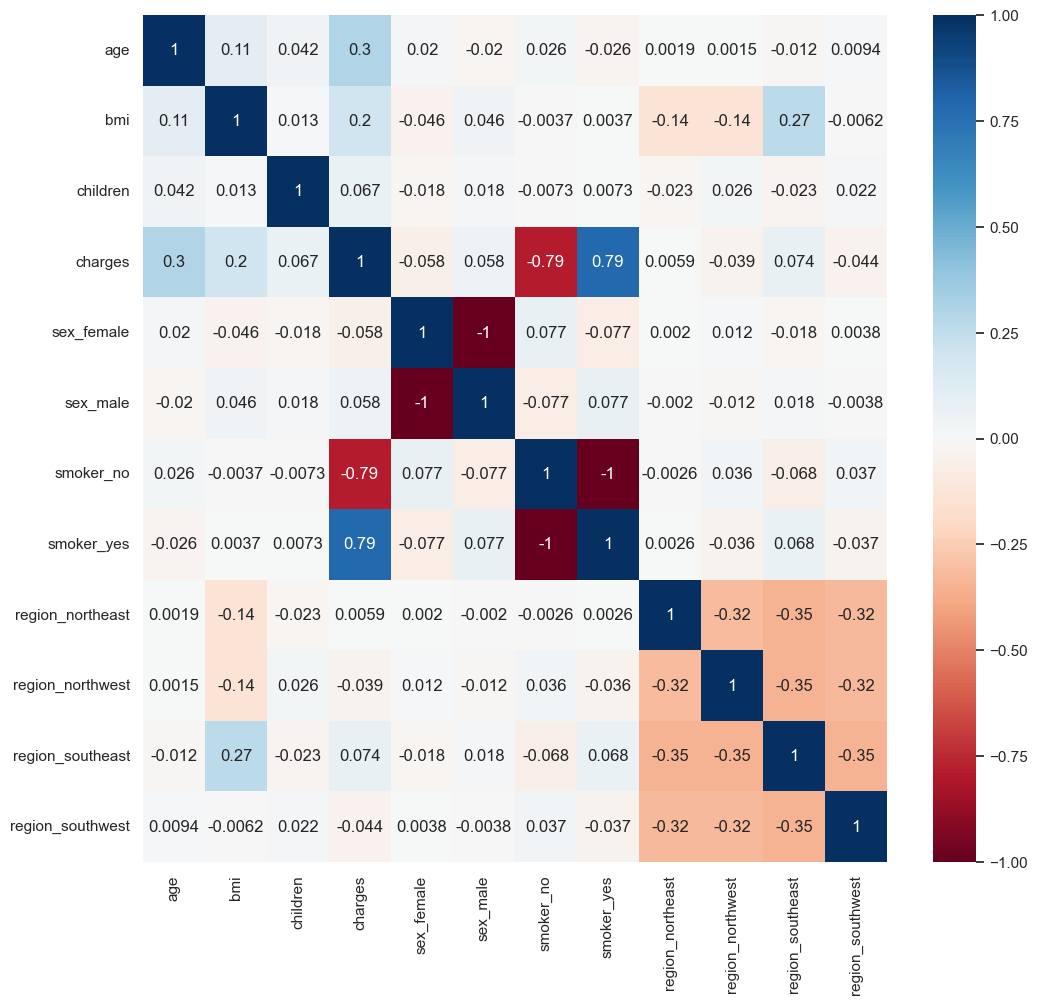

In [42]:
f,ax = plt.subplots(1,1,figsize=(12,11))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu')

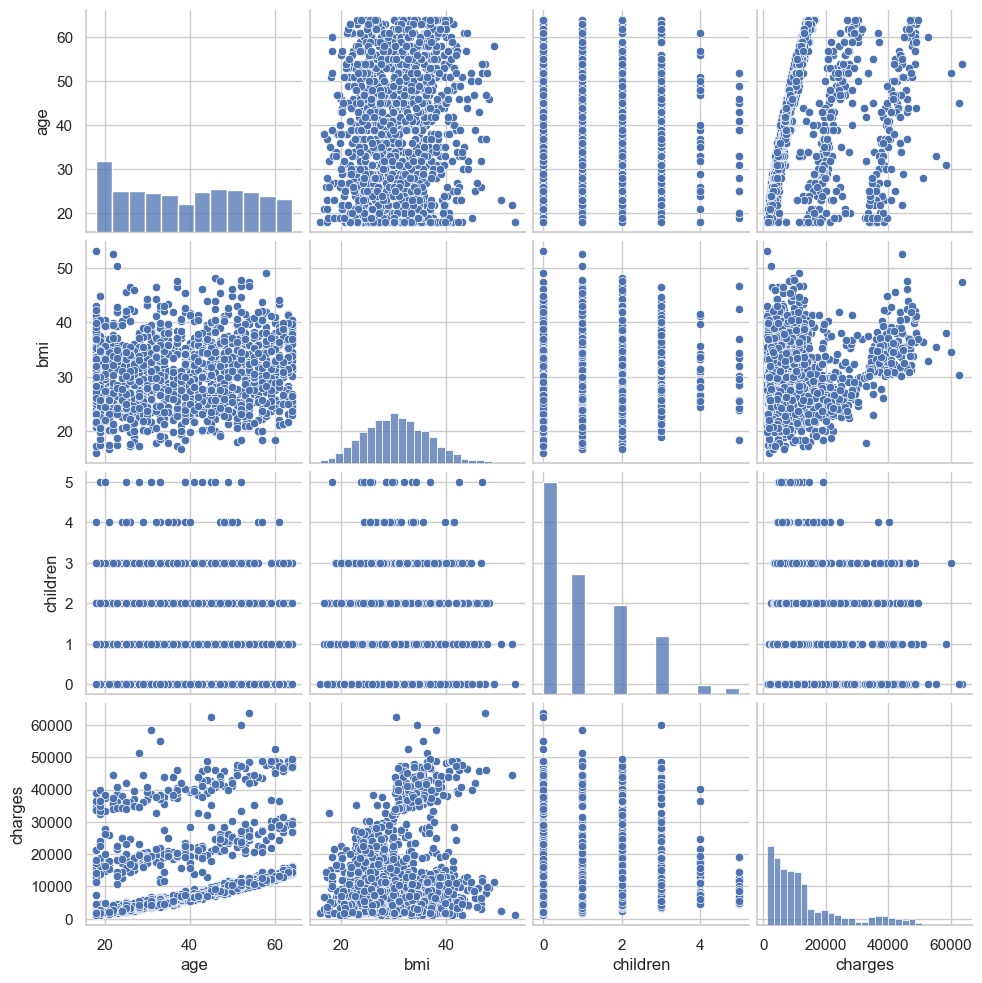

In [43]:
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'])

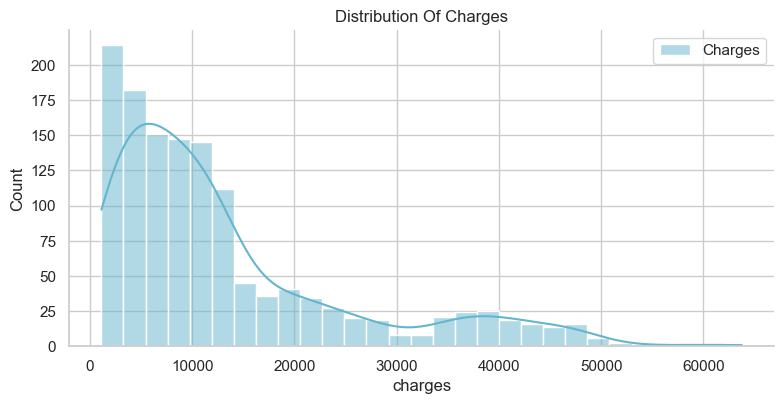

In [44]:
sns.set(style='whitegrid')
sns.displot(df['charges'], kde=True, color='c', height=4, aspect=2, label="Charges")
plt.title('Distribution Of Charges')
plt.legend()
plt.show()

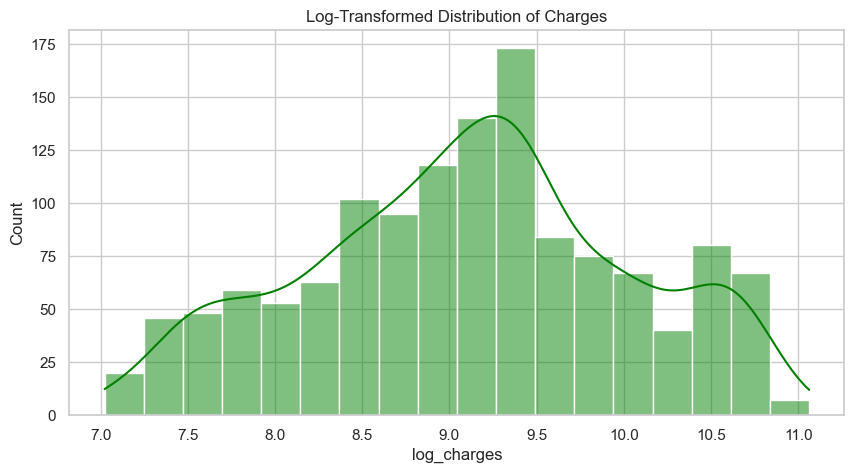

In [45]:
df['log_charges'] = np.log(df['charges'])

plt.figure(figsize=(10, 5))
sns.histplot(df['log_charges'], kde=True, color='green', alpha=0.5)
plt.title('Log-Transformed Distribution of Charges')
plt.show()

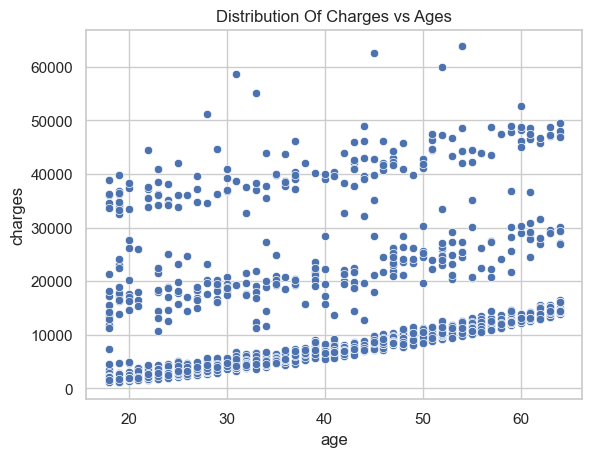

In [46]:
sns.set(style='whitegrid')
sns.scatterplot(x='age', y='charges' , data=df)
plt.title('Distribution Of Charges vs Ages')
plt.show()

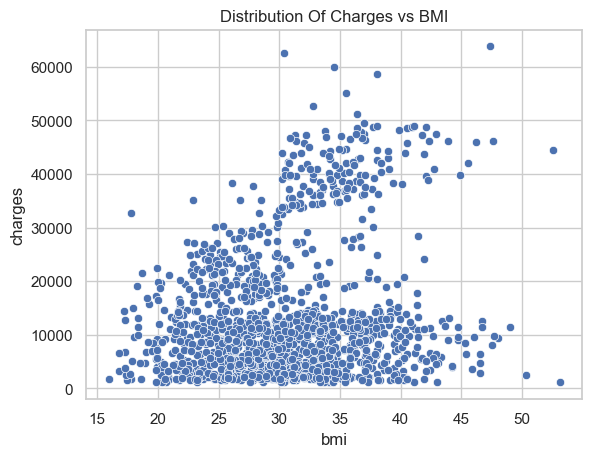

In [47]:
sns.set(style='whitegrid')
sns.scatterplot(x='bmi', y='charges' , data=df)
plt.title('Distribution Of Charges vs BMI')
plt.show()

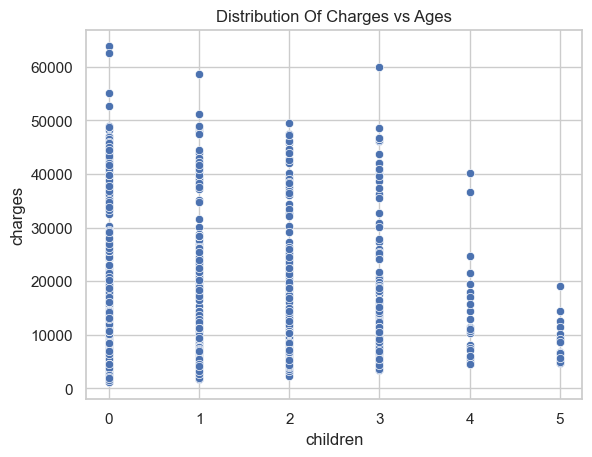

In [48]:
sns.set(style='whitegrid')
sns.scatterplot(x='children', y='charges' , data=df)
plt.title('Distribution Of Charges vs Ages')
plt.show()

## Preparing Final Dataset
---

In [49]:
X = df.drop('charges', axis=1)
y = df['charges']

### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123) 

## Model Development
---

### Training With Base Model (Decision Tree)
This step involves training a baseline machine learning model using the preprocessed dataset.
The purpose of this phase is to establish an initial performance benchmark before applying advanced tuning or model optimization techniques.

In [51]:
#Training the baseline model
decision_model = DecisionTreeRegressor(random_state=123)
decision_model.fit(X_train, y_train)
decision_model_pred = decision_model.predict(X_test)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(y_test, y_pred):
    rsquared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Optional: still print for quick feedback
    print(f'The R-Square (Accuracy) is {rsquared * 100:.2f}%')
    print('-------------------------------------------------')
    print(f'The Mean Squared Error (Error Rate) is {mse:.2f}')

    # ✅ Return metrics for further use
    return {
        "R2": rsquared,
        "MSE": mse
    }


#### Base Model Evaluation(Decision Tree)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [74]:
evaluate(y_test, decision_model_pred)

The R-Square (Accuracy) is 99.97%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 47090.37


{'R2': 0.9996953346698033, 'MSE': 47090.37099713612}

### Defining Hyper Parameters For Further Model Development
---

In [75]:
# Using Hyper Parameters
hyper_para = {
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2]
}

### Training With Fine Tuned Model(Fine Tuned Decision Tree)
In this step, a fine-tuned Decision Tree model is trained using optimized hyperparameters obtained through techniques such as grid search or cross-validation.
The goal is to improve model performance, enhance generalization, and reduce overfitting compared to the baseline model.

In [76]:
decision_model_tuned = DecisionTreeRegressor(random_state=123)
gridSearch = GridSearchCV(decision_model_tuned, hyper_para, cv = 5)
gridSearch.fit(X_train, y_train)
decision_model_tuned_best = gridSearch.best_estimator_
decision_model_tuned_pred = decision_model_tuned_best.predict(X_test)

#### Fine Tuned Model Evaluation
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [77]:
evaluate(y_test, decision_model_tuned_pred)

The R-Square (Accuracy) is 99.86%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 217420.18


{'R2': 0.9985933346902849, 'MSE': 217420.18122152652}

### Training With Base Model (Random Forest)
This step involves training a baseline machine learning model using the preprocessed dataset.
The purpose of this phase is to establish an initial performance benchmark before applying advanced tuning or model optimization techniques.

In [78]:
# Training with random forest regressor
randomForestModel = RandomForestRegressor(random_state=123)
randomForestModel.fit(X_train, y_train)
randomForestModelPred = randomForestModel.predict(X_test)

#### Base Model Evaluation(Random Forest)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [79]:
evaluate(y_test, randomForestModelPred)

The R-Square (Accuracy) is 99.88%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 182220.13


{'R2': 0.9988210720267082, 'MSE': 182220.1285763815}

### Defining Hyper Parameters For Further Model Development
---

In [80]:
# Using Hyper Parameters
randomForest_para = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2]
}

### Training With Fine Tuned Model(Fine Tuned Random Forest)
In this step, a fine-tuned Random Forest model is trained using optimized hyperparameters obtained through techniques such as grid search or cross-validation.
The goal is to improve model performance, enhance generalization, and reduce overfitting compared to the baseline model.

In [81]:
randomForestFineTuned = RandomForestRegressor(random_state=123)
grid2 = GridSearchCV(randomForestFineTuned, randomForest_para, cv = 5)
grid2.fit(X_train, y_train)
randomBestParams = grid2.best_estimator_
randomForestFineTunedPred = randomBestParams.predict(X_test)

#### Fine Tuned Model Evaluation(Fine Tuned Random Forest)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [82]:
evaluate(y_test, randomForestFineTunedPred)

The R-Square (Accuracy) is 99.89%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 175170.09


{'R2': 0.9988666843497946, 'MSE': 175170.09365841193}

#### Base Model Evaluation(XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [83]:
xgbModel = xgb.XGBRegressor()
xgbModel.fit(X_train, y_train)
xgbPred = xgbModel.predict(X_test)

#### Model Evaluation(XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [84]:
evaluate(y_test, xgbPred)

The R-Square (Accuracy) is 99.15%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 1320080.11


{'R2': 0.9914593443708734, 'MSE': 1320080.1084739938}

### Defining Hyper Parameters For Further Model Development
---

In [85]:
xgbModelFineTuned = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 90,
    learning_rate = 0.1,
    max_depth = 4,
    random_state = 123
)
xgbModelFineTuned.fit(X_train, y_train)
xgbModelFineTunedPred = xgbModelFineTuned.predict(X_test)

#### Fine Tuned Model Evaluation(Fine Tuned XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [86]:
evaluate(y_test, xgbModelFineTunedPred)

The R-Square (Accuracy) is 99.20%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 1234719.11


{'R2': 0.992011613032392, 'MSE': 1234719.112051401}

---
## Comparing Models
---

In [87]:
def compare_models(y_test, predictions_dict):
    results = {}
    for model_name, y_pred in predictions_dict.items():
        results[model_name] = evaluate(y_test, y_pred)
    
    results_df = pd.DataFrame(results).T  # Transpose so models are rows
    results_df = results_df.sort_values(by='R2', ascending=False)
    return results_df

## Model Evaluation

In [ ]:
model_predictions = {
    "Decision Tree (Base)": decision_model_pred,
    "Decision Tree (Tuned)": decision_model_tuned_pred,
    "Random Forest (Base)": randomForestModelPred,
    "Random Forest (Tuned)": randomForestFineTunedPred,
    "XGBoost (Base)": xgbPred,
    "XGBoost (Tuned)": xgbModelFineTunedPred
}

comparison_df = compare_models(y_test, model_predictions)
print(comparison_df)


The R-Square (Accuracy) is 99.97%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 47090.37
The R-Square (Accuracy) is 99.86%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 217420.18
The R-Square (Accuracy) is 99.88%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 182220.13
The R-Square (Accuracy) is 99.89%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 175170.09
The R-Square (Accuracy) is 99.15%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 1320080.11
The R-Square (Accuracy) is 99.20%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 1234719.11
                             R2           MSE
Decision Tree (Base)   0.999695  4.709037e+04
Random Forest (Tuned)  0.998867  1.751701e+05
Random Forest (Base)   0.998821  1.822201e+05
Decision Tree (Tu

In [90]:
# Create comparison DataFrames for each model
comparison_decision_base = pd.DataFrame({
    'Predicted Charge': decision_model_pred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_decision_tuned = pd.DataFrame({
    'Predicted Charge': decision_model_tuned_pred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_rf_base = pd.DataFrame({
    'Predicted Charge': randomForestModelPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_rf_tuned = pd.DataFrame({
    'Predicted Charge': randomForestFineTunedPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_xgb_base = pd.DataFrame({
    'Predicted Charge': xgbPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_xgb_tuned = pd.DataFrame({
    'Predicted Charge': xgbModelFineTunedPred[:5],
    'Actual Charge': y_test[:5].values
})


In [91]:
# Display all comparison tables
print("Decision Tree (Base Model):")
display(comparison_decision_base)

print("Decision Tree (Fine-Tuned Model):")
display(comparison_decision_tuned)

print("Random Forest (Base Model):")
display(comparison_rf_base)

print("Random Forest (Fine-Tuned Model):")
display(comparison_rf_tuned)

print("XGBoost (Base Model):")
display(comparison_xgb_base)

print("XGBoost (Fine-Tuned Model):")
display(comparison_xgb_tuned)


Decision Tree (Base Model):


,Predicted Charge,Actual Charge
0,2789.05740,2775.19215
1,11566.30055,11538.42100
2,15518.18025,15817.98570
3,2020.17700,2007.94500
4,10579.71100,10564.88450


Decision Tree (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,2796.377625,2775.19215
1,11560.262075,11538.42100
2,15824.760365,15817.98570
3,2020.364650,2007.94500
4,10560.491700,10564.88450


Random Forest (Base Model):


,Predicted Charge,Actual Charge
0,2783.298869,2775.19215
1,11527.520237,11538.42100
2,15777.574831,15817.98570
3,2020.968344,2007.94500
4,10585.785169,10564.88450


Random Forest (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,2780.762332,2775.19215
1,11519.026505,11538.42100
2,15826.684835,15817.98570
3,2025.810335,2007.94500
4,10591.431222,10564.88450


XGBoost (Base Model):


,Predicted Charge,Actual Charge
0,2730.917236,2775.19215
1,11585.449219,11538.42100
2,15847.199219,15817.98570
3,1931.129150,2007.94500
4,10693.466797,10564.88450


XGBoost (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,2741.343506,2775.19215
1,11570.419922,11538.42100
2,15840.775391,15817.98570
3,1985.137085,2007.94500
4,10548.551758,10564.88450


---
## Conclusion
---

In this project, we developed and compared multiple machine learning models to predict **medical insurance charges** based on demographic and lifestyle attributes such as age, BMI, smoking status, and region.  
The models explored included:
- **Decision Tree Regressor (Base and Fine-Tuned)**
- **Random Forest Regressor (Base and Fine-Tuned)**
- **XGBoost Regressor (Base and Fine-Tuned)**

### Key Findings

1. **Model Performance**  
   - Fine-tuned models consistently outperformed their base counterparts, highlighting the importance of hyperparameter optimization.  

2. **Feature Insights**  
   - The most influential features were **age**, **BMI**, and **smoking status**, aligning with real-world expectations for medical costs.  
   - Smokers, on average, incurred significantly higher charges, while younger individuals and non-smokers had lower costs.

3. **Evaluation and Comparison**  
   - The visual and tabular comparisons between predicted and actual charges showed that ensemble models (Random Forest, XGBoost) produced more stable and accurate predictions than the single Decision Tree model.

### Final Thoughts

Overall, the project demonstrates that machine learning techniques, particularly ensemble models, can effectively model and predict complex relationships in healthcare cost data.  
These predictive models can be leveraged by insurance providers or healthcare analysts to **estimate patient risk**, **design fair premium plans**, and **improve data-driven decision-making** in cost management.



---
## Model Deployment
---

In [35]:
#save the model
joblib.dump(xgbModelFineTuned, 'Health insurance Model')

['Health insurance Model']

In [36]:
import gradio as gr
import pickle

c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
with open ("Health insurance Model", 'rb') as file :
    model = pickle.load(file)

In [39]:
def insurance_predictor(age, bmi, children, sex, smoker, region):
    # One-hot encode sex
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode smoker
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode region
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create input DataFrame
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Predict
    prediction = model.predict(df)[0]
    return f"This is your Insurance Cost: ${prediction:.2f}"

In [40]:
insurance_predictor(40, 70, 5, 0, 1, 3)

'This is your Insurance Cost: $45248.48'

In [ ]:
radio = gr.Interface(
    fn = insurance_predictor,
    inputs = [
        gr.Number(label = "Age"),
        gr.Number(label = "BMI"),
        gr.Number(label = "Number of Children"),
        gr.Dropdown([0,1],label = "Sex (0: Female, 1: Male)"),
        gr.Radio([0,1],label = "Smoker (0: No, 1: Yes)"),
        gr.Radio([0,1,2,3,],label = "Region (0: Northeast, 1: Northwest, 2:Southeast, 3: Southwest)"),
    ],
    outputs = "text",
    title = "HEALTH INSURANCE COST PREDICTOR",
    description = "Enter your details to estimate your health insurance Cost"
)
radio.launch(share = True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://1c911967dd69cf0bc8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio\flagged\dataset1.csv


In [42]:
#App 2: Improvement to include name and store records
# (But limited to stores records only when file is closed)

In [43]:
import os
from datetime import datetime

In [44]:
with open ("Health insurance Model", 'rb') as file :
    model = pickle.load(file)

In [45]:
# Prediction function with added name + save to Excel
def insurance_predictor(name, age, bmi, children, sex, smoker, region):
    # One-hot encode sex
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode smoker
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode region
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create input DataFrame
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Predict
    prediction = model.predict(df)[0]

    # ==== Save inputs and prediction ====
    file_path = "Customer_Insurance_data_2.xlsx"
    new_data = pd.DataFrame([{
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Name": name,
        "Age": age,
        "BMI": bmi,
        "Number_of_Children": children,
        "Sex (0=Female,1=Male)": sex,
        "Smoker (0=No,1=Yes)": smoker,
        "Region (0=NE,1=NW,2=SE,3=SW)": region,
        "Predicted_Cost": prediction
    }])

    if os.path.exists(file_path):
        old_data = pd.read_excel(file_path)
        all_data = pd.concat([old_data, new_data], ignore_index=True)
    else:
        all_data = new_data

    # ---- Updated Excel write section (handles file open safely) ----
    try:
        all_data.to_excel(file_path, index=False)
        print(f"Data saved to: {os.path.abspath(file_path)}")
    except PermissionError:
        # If Excel is open, write to a temporary backup file instead
        temp_file = f"customer_insurance_data_backup_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"
        all_data.to_excel(temp_file, index=False)
        print(f"Excel file is open. Data saved to temporary file: {os.path.abspath(temp_file)}")

    return f"Hello {name}, this is your Insurance Cost: ${prediction:.2f}"

In [46]:
# Gradio app (added name input only)
radio = gr.Interface(
    fn=insurance_predictor,
    inputs=[
        gr.Textbox(label="Name"),
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Number of Children"),
        gr.Dropdown([0, 1], label="Sex (0: Female, 1: Male)"),
        gr.Radio([0, 1], label="Smoker (0: No, 1: Yes)"),
        gr.Radio([0, 1, 2, 3], label="Region (0: Northeast, 1: Northwest, 2:Southeast, 3: Southwest)"),
    ],
    outputs="text",
    title="HEALTH INSURANCE COST PREDICTOR",
    description="Enter your details (including your name) to estimate your health insurance cost."
)

radio.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://35288f5cd37164000f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [47]:
import win32com.client as win32 #Enables communication with windows applications like Excel via COM automation
import pythoncom #Supports COM operations; required when using wind32com to manage COM threads safely

In [48]:
# Prediction function with added name + auto-update in open Excel file
def insurance_predictor(name, age, bmi, children, sex, smoker, region):
    # One-hot encode sex
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode smoker
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode region
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create input DataFrame
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Predict
    prediction = model.predict(df)[0]

    # ==== Save inputs and prediction ====
    file_path = os.path.abspath("UPDTcustomer_insurance_data_3.xlsx")
    new_data = pd.DataFrame([{
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Name": name,
        "Age": age,
        "BMI": bmi,
        "Number_of_Children": children,
        "Sex (0=Female,1=Male)": sex,
        "Smoker (0=No,1=Yes)": smoker,
        "Region (0=NE,1=NW,2=SE,3=SW)": region,
        "Predicted_Cost": prediction
    }])

    try:
        # --- Try connecting to running Excel ---
        pythoncom.CoInitialize()
        excel = win32.GetActiveObject("Excel.Application")

        wb = None
        for book in excel.Workbooks:
            if book.FullName.lower() == file_path.lower():
                wb = book
                break

        if wb is None:
            wb = excel.Workbooks.Open(file_path)

        ws = wb.Worksheets(1)

        # Find first empty row
        last_row = ws.UsedRange.Rows.Count
        if ws.Cells(last_row, 1).Value is None:
            start_row = last_row
        else:
            start_row = last_row + 1

        # Append values to next row
        headers = ["Timestamp", "Name", "Age", "BMI", "Number_of_Children",
                   "Sex (0=Female,1=Male)", "Smoker (0=No,1=Yes)",
                   "Region (0=NE,1=NW,2=SE,3=SW)", "Predicted_Cost"]

        for col, header in enumerate(headers, start=1):
            ws.Cells(start_row, col).Value = new_data.iloc[0][header]

        wb.Save()
        print(f"Record added directly to open Excel workbook at {file_path}")

    except Exception as e:
        print(f"Could not connect to open Excel ({e}). Writing normally instead.")
        # Fallback to pandas write if Excel not open
        if os.path.exists(file_path):
            old_data = pd.read_excel(file_path)
            all_data = pd.concat([old_data, new_data], ignore_index=True)
        else:
            all_data = new_data
        all_data.to_excel(file_path, index=False)
        print(f"Data saved to: {file_path}")

    return f"Hello {name}, this is your Insurance Cost: NGN{prediction:.2f}"

In [ ]:
# Gradio app (added name input only)
radio = gr.Interface(
    fn=insurance_predictor,
    inputs=[
        gr.Textbox(label="Name"),
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Number of Children"),
        gr.Dropdown([0, 1], label="Sex (0: Female, 1: Male)"),
        gr.Radio([0, 1], label="Smoker (0: No, 1: Yes)"),
        gr.Radio([0, 1, 2, 3], label="Region (0: Northeast, 1: Northwest, 2:Southeast, 3: Southwest)"),
    ],
    outputs="text",
    title="HEALTH INSURANCE COST PREDICTOR",
    description="Enter your details (including your name) to estimate your health insurance cost."
)

radio.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://7730042042646ac457.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Could not connect to open Excel ((-2147221005, 'Invalid class string', None, None)). Writing normally instead.


Traceback (most recent call last):
  File "C:\Users\Oribi\AppData\Local\Temp\ipykernel_11916\852395132.py", line 61, in insurance_predictor
    excel = win32.GetActiveObject("Excel.Application")
  File "C:\Users\Oribi\AppData\Roaming\Python\Python313\site-packages\win32com\client\__init__.py", line 93, in GetActiveObject
    resultCLSID = pywintypes.IID(Class)
pywintypes.com_error: (-2147221005, 'Invalid class string', None, None)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\gradio\queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
            

Could not connect to open Excel ((-2147221005, 'Invalid class string', None, None)). Writing normally instead.


Traceback (most recent call last):
  File "C:\Users\Oribi\AppData\Local\Temp\ipykernel_11916\852395132.py", line 61, in insurance_predictor
    excel = win32.GetActiveObject("Excel.Application")
  File "C:\Users\Oribi\AppData\Roaming\Python\Python313\site-packages\win32com\client\__init__.py", line 93, in GetActiveObject
    resultCLSID = pywintypes.IID(Class)
pywintypes.com_error: (-2147221005, 'Invalid class string', None, None)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\gradio\queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
            